# Confidence Intervals for Normally Distributed Data

In [3]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from math import gamma
%matplotlib inline

Let's look at an example with data we assume to be normally distributed:

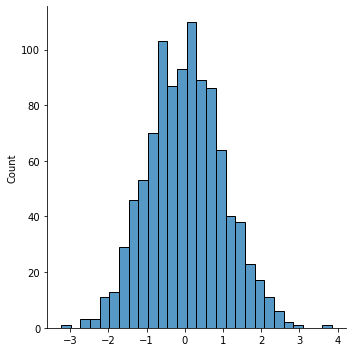

In [4]:
# A normally distributed variable with a population size of 1000

pop = list(stats.norm.rvs(size=1000,
                          random_state=42))
sns.displot(x=pop)

#### By Hand

In [5]:
# Let's calculate the population mean.

pop_mean = np.mean(pop)
pop_mean

0.01933205582232549

In [6]:
# And the population standard deviation.

pop_std = np.std(pop)
pop_std

0.9787262077473543

Let's say we take a sample of fifty from our population, and that we want an 80%-confidence interval for our estimate of the population mean. The $z$-score that corresponds to an 80%-confidence interval is:

[$z$-table](http://z-table.com)

In [9]:
z = stats.norm.ppf(0.9)
#Why do we want 0.9 here? = 10% on either side. positive and negative. Subtracting these from the range to accomodate.
z

1.2815515655446004

0.17715311316172172

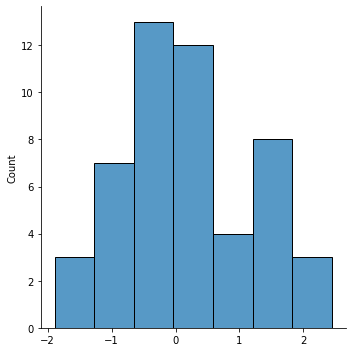

In [10]:
np.random.seed(42)
sample = np.random.choice(a=pop, size=50)
sns.displot(x=sample)
np.mean(sample)

In [11]:
#calculate the confidence interval (margin of error)
pop_std / np.sqrt(50) * z # std divided by sqrt of n, times the z score

0.17738312474862944

#### Using Python Code (Citibike Problem)

In [12]:
citi_mean = 12.5
citi_std = 8
citi_n = 400

In [13]:
citi_tval = stats.t.ppf(0.975, citi_n-1)

In [14]:
citi_marerr = (citi_tval * citi_std) / (citi_n **.5)

In [15]:
citi_ci = (citi_mean - citi_marerr, citi_mean + citi_marerr)
citi_ci

(11.713629081631677, 13.286370918368323)

Thus we'd report our estimate of the population mean as 0.177 $\pm$ 0.177, or, equivalently, as (0, 0.354). Note that the true population mean of 0.0193 is in fact in this range.


## Binomial Distribution

What if we have a binomial distribution? Suppose we have the following sample statistic:

A survey of 3000 voters found that 1245 approved of the job the governor was doing. How can we express our 95%-confidence level about voter approval of the governor among _all_ voters?

To solve this, we'll once again start with our sample proportion as the center of our CI and step out from it by an amount proportional to the relevant z-score.

But by how much exactly? Forgoing the [proof](https://newonlinecourses.science.psu.edu/stat414/node/208/), the answer *for suitably large samples* (we're relying here on the Central Limit Theorem) is as follows:

left endpt.: $\hat{p} - z\times\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$ <br/>
right endpt.: $\hat{p} + z\times\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$

Let's answer our original question about the voters:

We have:

- $\hat{p} = \frac{1245}{3000} = 0.415$;
- $n = 3000$;
- $z = 1.96$.

Therefore:

In [ ]:
p_hat = 0.415
n = 3000
z_voters = stats.norm.ppf(0.975)
step = z_voters * np.sqrt(p_hat * (1-p_hat) / n)

interval = (p_hat - step, p_hat + step)
interval

## Confidence Intervals for Population Proportion

* Find the Za/2 multiplier for the level of confidence
* For 95% confidence,

In [16]:
n = 1500
p_hat = 660 / 1500